In [64]:
import datetime
import time
import urllib.request
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt

In [65]:
def get_df_from_yahoo_finance (symbol): 

    end_date = datetime.datetime.now()
    end_date = int(round(end_date.timestamp())) * 1000  #<-- Convert datetime to milliseconds 
    end_date_str = str(end_date)
    end_date_str = end_date_str[:10]  #<-- This removes all but the last 10 millisecond values for the time which is format yahoo wants

    start_date_str = '345427200'
  

    ticker_dataframe = {}
    

    # Build Yahoo finance URL for the data request.
    
    yahoo_finance_url_with_symbol = ('https://query1.finance.yahoo.com/v7/finance/download/' + str(symbol)
                                     + '?period1=' + str(start_date_str) + '&period2=' + str(end_date_str)
                                     + '&interval=1mo&events=history&includeAdjustedClose=true')

    url2 = urllib.request.urlopen(yahoo_finance_url_with_symbol) #request data (comes as CSV)
    
    ticker_dataframe = pd.read_csv(url2)  #convert CSV in memory from the Yahoo request to dataframe
    ticker_dataframe.insert(1, "Ticker", symbol)

    return (ticker_dataframe)

In [66]:
list_of_tickers_for_yahoo_data_dump = ['BTC-USD','SPY','XLF','XLU','XLV','VAW','VNQ','XLP','XLY','FXN','XLI','IYC','QQQ',]   # <-- Add tickers here

tickers_and_data_df = pd.DataFrame({})

for ticker in list_of_tickers_for_yahoo_data_dump:
    
    single_ticker_df = get_df_from_yahoo_finance(ticker)
    tickers_and_data_df = pd.concat([tickers_and_data_df, single_ticker_df])
tickers_and_data_df

,Date,Ticker,Open,High,Low,Close,Adj Close,Volume
0,2014-10-01,BTC-USD,387.427002,411.697998,289.295990,338.321014,338.321014,902994450
1,2014-11-01,BTC-USD,338.649994,457.092987,320.626007,378.046997,378.046997,659733360
2,2014-12-01,BTC-USD,378.248993,384.037994,304.231995,320.192993,320.192993,553102310
3,2015-01-01,BTC-USD,320.434998,320.434998,171.509995,217.464005,217.464005,1098811912
4,2015-02-01,BTC-USD,216.867004,265.610992,212.014999,254.263000,254.263000,711518700
...,...,...,...,...,...,...,...,...
277,2022-05-01,QQQ,312.829987,330.290009,280.209991,308.279999,307.688538,1951162500
278,2022-06-01,QQQ,310.470001,314.559998,269.279999,280.279999,279.742279,1359608000
279,2022-07-01,QQQ,278.950012,316.390015,276.750000,315.459991,315.459991,1177407900
280,2022-08-01,QQQ,313.649994,326.470001,311.839996,320.709991,320.709991,285486600


In [67]:
pivot = pd.pivot_table(
    data=tickers_and_data_df,
    index='Date',
    columns ='Ticker',
    
)

pivot = pivot.dropna()


In [68]:
# from pathlib import Path  
# filepath = Path('data/pivot.csv')  
# filepath.parent.mkdir(parents=True, exist_ok=True)  
# pivot.to_csv(filepath)

In [69]:
pivot = pivot['Close']
pivot

Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,
2014-10-01,338.321014,24.200001,31.905001,101.400002,201.660004,108.400002,78.989998,19.366369,55.209999,46.709999,45.470001,67.269997,68.099998
2014-11-01,378.046997,21.500000,33.927502,106.010002,207.199997,109.559998,80.570000,19.821283,56.910000,49.299999,46.000000,69.610001,71.809998
2014-12-01,320.192993,20.930000,34.439999,103.250000,205.539993,107.389999,81.000000,20.089357,56.580002,48.490002,47.220001,68.379997,72.150002
2015-01-01,217.464005,20.010000,33.730000,101.099998,199.449997,104.480003,86.550003,18.692120,54.570000,48.020000,48.320000,69.269997,69.989998
2015-02-01,254.263000,21.879999,36.115002,108.400002,210.660004,112.580002,83.370003,19.780666,57.490002,50.009998,45.230000,72.239998,75.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,37714.875000,15.120000,66.660004,313.250000,412.000000,186.119995,103.940002,34.509998,95.139999,77.639999,71.260002,130.289993,162.880005
2022-05-01,31792.310547,17.590000,63.599998,308.279999,412.929993,188.179993,99.070000,35.470001,94.699997,74.470001,74.330002,132.229996,154.539993
2022-06-01,19784.726563,14.760000,56.740002,280.279999,377.250000,160.210007,91.110001,31.450001,87.339996,72.180000,70.129997,128.240005,137.479996


In [70]:
pct_change = pivot.pct_change().dropna()
pct_change.head()


Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,
2014-11-01,0.117421,-0.111570,0.063391,0.045464,0.027472,0.010701,0.020003,0.023490,0.030792,0.055449,0.011656,0.034785,0.054479
2014-12-01,-0.153034,-0.026512,0.015106,-0.026035,-0.008012,-0.019806,0.005337,0.013525,-0.005799,-0.016430,0.026522,-0.017670,0.004735
2015-01-01,-0.320835,-0.043956,-0.020616,-0.020823,-0.029629,-0.027097,0.068519,-0.069551,-0.035525,-0.009693,0.023295,0.013016,-0.029938
2015-02-01,0.169219,0.093453,0.070709,0.072206,0.056205,0.077527,-0.036742,0.058236,0.053509,0.041441,-0.063949,0.042876,0.085441
2015-03-01,-0.039483,-0.035649,-0.001800,-0.025830,-0.020080,-0.035797,0.011275,-0.009856,-0.029918,-0.025395,-0.017687,0.003599,-0.008161


In [71]:
std = pct_change.std()
std

Ticker
BTC-USD    0.230067
FXN        0.123623
IYC        0.052193
QQQ        0.052976
SPY        0.043952
VAW        0.057105
VNQ        0.048265
XLF        0.057309
XLI        0.052963
XLP        0.035730
XLU        0.042043
XLV        0.041628
XLY        0.055970
dtype: float64

In [72]:
def sharpe_ratio_calculator(list):
    for ticker in list:
        annualized_std = std[ticker]*np.sqrt(12)
        average_annual_return = pct_change[ticker].mean()*12
        sharpe_ratio = average_annual_return/annualized_std
        print(f"{ticker} sharpe ratio = {sharpe_ratio}")
        

In [73]:
sharpe_ratio_calculator(list_of_tickers_for_yahoo_data_dump)    

BTC-USD sharpe ratio = 1.0614713477149984
SPY sharpe ratio = 0.6790724332995453
XLF sharpe ratio = 0.45699134501536964
XLU sharpe ratio = 0.5043556440984895
XLV sharpe ratio = 0.6684850141367809
VAW sharpe ratio = 0.39118099065694784
VNQ sharpe ratio = 0.25099371614290633
XLP sharpe ratio = 0.5453453703962002
XLY sharpe ratio = 0.6806329204278024
FXN sharpe ratio = 0.0823154328992225
XLI sharpe ratio = 0.4787295679718347
IYC sharpe ratio = 0.6140528654851116
QQQ sharpe ratio = 0.8964076203946585


In [74]:
pct_change.corr()

Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,
BTC-USD,1.000000,0.180820,0.350277,0.324434,0.349556,0.300117,0.241567,0.331180,0.315860,0.251986,0.252138,0.217449,0.321755
FXN,0.180820,1.000000,0.580583,0.497094,0.652267,0.683275,0.454435,0.666217,0.616394,0.317005,0.140936,0.448178,0.590391
IYC,0.350277,0.580583,1.000000,0.897055,0.942506,0.800834,0.706800,0.793912,0.866232,0.655966,0.373555,0.736781,0.973374
QQQ,0.324434,0.497094,0.897055,1.000000,0.927126,0.745646,0.618385,0.684074,0.773753,0.580999,0.348412,0.731023,0.914033
SPY,0.349556,0.652267,0.942506,0.927126,1.000000,0.884060,0.731984,0.859988,0.922547,0.695169,0.442961,0.811171,0.928545
VAW,0.300117,0.683275,0.800834,0.745646,0.884060,1.000000,0.605587,0.812742,0.894697,0.576208,0.342090,0.741868,0.788687
VNQ,0.241567,0.454435,0.706800,0.618385,0.731984,0.605587,1.000000,0.583249,0.675798,0.678754,0.660800,0.642180,0.679509
XLF,0.331180,0.666217,0.793912,0.684074,0.859988,0.812742,0.583249,1.000000,0.881616,0.527922,0.267126,0.635535,0.732420
XLI,0.315860,0.616394,0.866232,0.773753,0.922547,0.894697,0.675798,0.881616,1.000000,0.653337,0.379013,0.721892,0.818847


In [75]:
#calculate rolling var and cov
rolling_cov_btc_spy = pct_change['BTC-USD'].rolling(window=3).cov(pct_change['SPY'])
rolling_var_spy = pct_change['SPY'].rolling(window=3).var()

In [76]:
rolling_beta_btc = rolling_cov_btc_spy/rolling_var_spy

In [77]:
rolling_cov =pd.DataFrame()
rolling_beta=pd.DataFrame()
def rolling_beta_calculate(list):
    for ticker in list:
        rolling_cov[ticker]=pct_change[ticker].rolling(window=3).cov(pct_change['SPY'])
        rolling_beta[ticker] = rolling_cov[ticker]/rolling_var_spy
        #print(f"added {ticker} to pct_change dataframe")
        print(f"{ticker}")
    return rolling_beta

In [78]:
rolling_beta_calculate(list_of_tickers_for_yahoo_data_dump)

BTC-USD
SPY
XLF
XLU
XLV
VAW
VNQ
XLP
XLY
FXN
XLI
IYC
QQQ


,BTC-USD,SPY,XLF,XLU,XLV,VAW,VNQ,XLP,XLY,FXN,XLI,IYC,QQQ
Date,,,,,,,,,,,,,
2014-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,7.669830,1.0,1.496357,-0.225057,0.489483,0.681473,-0.725046,1.228106,1.470819,-1.303788,1.148540,1.460301,1.245132
2015-02-01,5.551240,1.0,1.307480,-1.106192,0.483981,1.286808,-1.095696,0.665604,1.324210,1.662012,1.011272,1.018650,1.185855
2015-03-01,4.569274,1.0,1.260196,-0.859233,0.411907,1.321141,-0.997479,0.703241,1.299275,1.635958,1.058892,1.020463,1.161011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.804168,1.0,0.761242,1.149525,0.845764,0.775181,0.810361,-0.072402,1.327796,1.294363,0.872346,1.073136,1.483461
2022-05-01,1.485523,1.0,0.910595,1.099197,0.814102,0.732563,0.612363,-0.216906,1.204919,1.537868,0.858712,1.002586,1.451993
2022-06-01,1.290919,1.0,1.499982,1.037003,0.611519,1.170377,0.148920,-0.420758,0.714870,2.998727,0.808881,0.715152,1.097149


In [79]:
rolling_beta.dropna()

,BTC-USD,SPY,XLF,XLU,XLV,VAW,VNQ,XLP,XLY,FXN,XLI,IYC,QQQ
Date,,,,,,,,,,,,,
2015-01-01,7.669830,1.0,1.496357,-0.225057,0.489483,0.681473,-0.725046,1.228106,1.470819,-1.303788,1.148540,1.460301,1.245132
2015-02-01,5.551240,1.0,1.307480,-1.106192,0.483981,1.286808,-1.095696,0.665604,1.324210,1.662012,1.011272,1.018650,1.185855
2015-03-01,4.569274,1.0,1.260196,-0.859233,0.411907,1.321141,-0.997479,0.703241,1.299275,1.635958,1.058892,1.020463,1.161011
2015-04-01,2.875885,1.0,0.922337,-0.664173,0.570376,1.458142,-0.534908,0.891745,1.280991,1.523093,1.103491,1.019260,1.272867
2015-05-01,0.344500,1.0,0.674877,0.609546,0.553325,1.538824,-1.201673,0.856896,0.488423,1.020501,0.970060,0.107551,1.482785
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,1.804168,1.0,0.761242,1.149525,0.845764,0.775181,0.810361,-0.072402,1.327796,1.294363,0.872346,1.073136,1.483461
2022-05-01,1.485523,1.0,0.910595,1.099197,0.814102,0.732563,0.612363,-0.216906,1.204919,1.537868,0.858712,1.002586,1.451993
2022-06-01,1.290919,1.0,1.499982,1.037003,0.611519,1.170377,0.148920,-0.420758,0.714870,2.998727,0.808881,0.715152,1.097149


In [80]:
rolling_beta_plot = rolling_beta.hvplot(
    ylabel = "BETA",
    xlabel="Date",  
    width=1000,
    height=600,
    stacked = True,
    legend = 'top_left'
    
)

In [81]:
rolling_beta_plot

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [82]:
cov = pct_change['BTC-USD'].cov(pct_change['SPY'])
var = pct_change['SPY'].var()
beta = cov/var

In [83]:
beta

1.8297708071101626

# McKenzie Litmus test


In [84]:
#sharpe ratio(new investment) > (current sharpe ratio * expected correlation)
sharpe_dict = {}

def sharpe_ratio_calculator(list):
    for ticker in list:
        annualized_std = std[ticker]*np.sqrt(12)
        average_annual_return = pct_change[ticker].mean()*12
        sharpe_ratio = average_annual_return/annualized_std
        print(f"{ticker} sharpe ratio = {sharpe_ratio}")
        sharpe_dict.update({ticker:sharpe_ratio})
    return sharpe_dict

In [85]:
sharpe_ratio_calculator(list_of_tickers_for_yahoo_data_dump)

BTC-USD sharpe ratio = 1.0614713477149984
SPY sharpe ratio = 0.6790724332995453
XLF sharpe ratio = 0.45699134501536964
XLU sharpe ratio = 0.5043556440984895
XLV sharpe ratio = 0.6684850141367809
VAW sharpe ratio = 0.39118099065694784
VNQ sharpe ratio = 0.25099371614290633
XLP sharpe ratio = 0.5453453703962002
XLY sharpe ratio = 0.6806329204278024
FXN sharpe ratio = 0.0823154328992225
XLI sharpe ratio = 0.4787295679718347
IYC sharpe ratio = 0.6140528654851116
QQQ sharpe ratio = 0.8964076203946585


{'BTC-USD': 1.0614713477149984,
 'SPY': 0.6790724332995453,
 'XLF': 0.45699134501536964,
 'XLU': 0.5043556440984895,
 'XLV': 0.6684850141367809,
 'VAW': 0.39118099065694784,
 'VNQ': 0.25099371614290633,
 'XLP': 0.5453453703962002,
 'XLY': 0.6806329204278024,
 'FXN': 0.0823154328992225,
 'XLI': 0.4787295679718347,
 'IYC': 0.6140528654851116,
 'QQQ': 0.8964076203946585}

In [86]:
corr_df = pct_change.corr()
display(corr_df)
pandemic_corr = pct_change['2020-06-01':'2022-01-01'].corr()
display(pandemic_corr)
before_pandemic_corr = pct_change['2014-10-01':'2020-02-01'].corr()
display(before_pandemic_corr)

Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,
BTC-USD,1.000000,0.180820,0.350277,0.324434,0.349556,0.300117,0.241567,0.331180,0.315860,0.251986,0.252138,0.217449,0.321755
FXN,0.180820,1.000000,0.580583,0.497094,0.652267,0.683275,0.454435,0.666217,0.616394,0.317005,0.140936,0.448178,0.590391
IYC,0.350277,0.580583,1.000000,0.897055,0.942506,0.800834,0.706800,0.793912,0.866232,0.655966,0.373555,0.736781,0.973374
QQQ,0.324434,0.497094,0.897055,1.000000,0.927126,0.745646,0.618385,0.684074,0.773753,0.580999,0.348412,0.731023,0.914033
SPY,0.349556,0.652267,0.942506,0.927126,1.000000,0.884060,0.731984,0.859988,0.922547,0.695169,0.442961,0.811171,0.928545
VAW,0.300117,0.683275,0.800834,0.745646,0.884060,1.000000,0.605587,0.812742,0.894697,0.576208,0.342090,0.741868,0.788687
VNQ,0.241567,0.454435,0.706800,0.618385,0.731984,0.605587,1.000000,0.583249,0.675798,0.678754,0.660800,0.642180,0.679509
XLF,0.331180,0.666217,0.793912,0.684074,0.859988,0.812742,0.583249,1.000000,0.881616,0.527922,0.267126,0.635535,0.732420
XLI,0.315860,0.616394,0.866232,0.773753,0.922547,0.894697,0.675798,0.881616,1.000000,0.653337,0.379013,0.721892,0.818847


Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,
BTC-USD,1.000000,0.354962,0.582535,0.419029,0.491113,0.446195,0.380046,0.541206,0.451365,0.196524,0.282602,0.323671,0.505014
FXN,0.354962,1.000000,0.354308,0.226878,0.350162,0.213369,0.194038,0.680420,0.415916,0.107103,-0.332972,0.081290,0.184441
IYC,0.582535,0.354308,1.000000,0.869964,0.937557,0.799791,0.776912,0.729453,0.858449,0.643188,0.274362,0.717866,0.914686
QQQ,0.419029,0.226878,0.869964,1.000000,0.900124,0.617839,0.719552,0.484728,0.654700,0.545719,0.213795,0.699169,0.913307
SPY,0.491113,0.350162,0.937557,0.900124,1.000000,0.846123,0.880825,0.753278,0.876082,0.778928,0.407618,0.847984,0.865159
VAW,0.446195,0.213369,0.799791,0.617839,0.846123,1.000000,0.819643,0.778000,0.922534,0.810932,0.539685,0.763036,0.647727
VNQ,0.380046,0.194038,0.776912,0.719552,0.880825,0.819643,1.000000,0.653680,0.768262,0.730371,0.534587,0.891489,0.708426
XLF,0.541206,0.680420,0.729453,0.484728,0.753278,0.778000,0.653680,1.000000,0.851955,0.569116,0.183796,0.545126,0.480182
XLI,0.451365,0.415916,0.858449,0.654700,0.876082,0.922534,0.768262,0.851955,1.000000,0.790775,0.349652,0.681630,0.673470


Ticker,BTC-USD,FXN,IYC,QQQ,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,,,,,
BTC-USD,1.000000,-0.062754,0.097171,0.150621,0.150797,0.102868,0.011117,0.119481,0.128176,0.182787,0.159151,0.084091,0.077164
FXN,-0.062754,1.000000,0.495704,0.449825,0.615425,0.721579,0.247645,0.585373,0.591646,0.232377,-0.020667,0.393449,0.553398
IYC,0.097171,0.495704,1.000000,0.868000,0.922051,0.751079,0.504960,0.764425,0.838066,0.677075,0.200026,0.761090,0.979066
QQQ,0.150621,0.449825,0.868000,1.000000,0.922789,0.737918,0.439556,0.684443,0.779185,0.591304,0.220961,0.706220,0.889459
SPY,0.150797,0.615425,0.922051,0.922789,1.000000,0.865148,0.515956,0.851424,0.923944,0.674461,0.253935,0.803398,0.927680
VAW,0.102868,0.721579,0.751079,0.737918,0.865148,1.000000,0.335264,0.773598,0.874172,0.422712,0.035170,0.706227,0.791718
VNQ,0.011117,0.247645,0.504960,0.439556,0.515956,0.335264,1.000000,0.320088,0.441599,0.622753,0.646042,0.521698,0.467760
XLF,0.119481,0.585373,0.764425,0.684443,0.851424,0.773598,0.320088,1.000000,0.841653,0.466313,0.037674,0.650624,0.754472
XLI,0.128176,0.591646,0.838066,0.779185,0.923944,0.874172,0.441599,0.841653,1.000000,0.568115,0.163867,0.736456,0.835941


C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


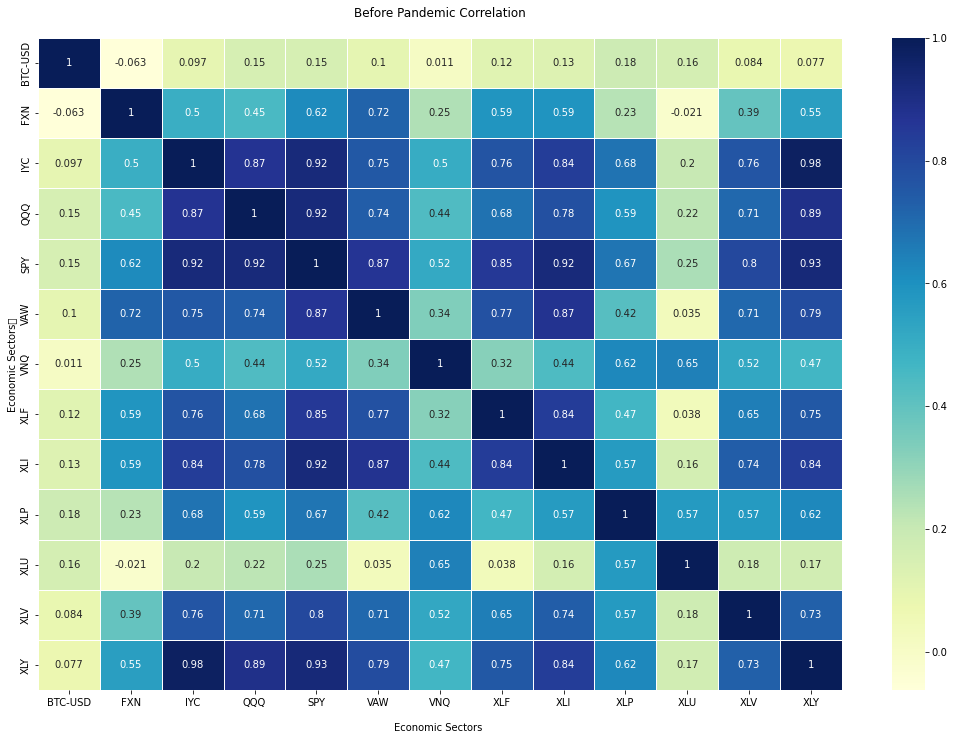

<Figure size 432x288 with 0 Axes>

In [87]:
import seaborn as sns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(before_pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Before Pandemic Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

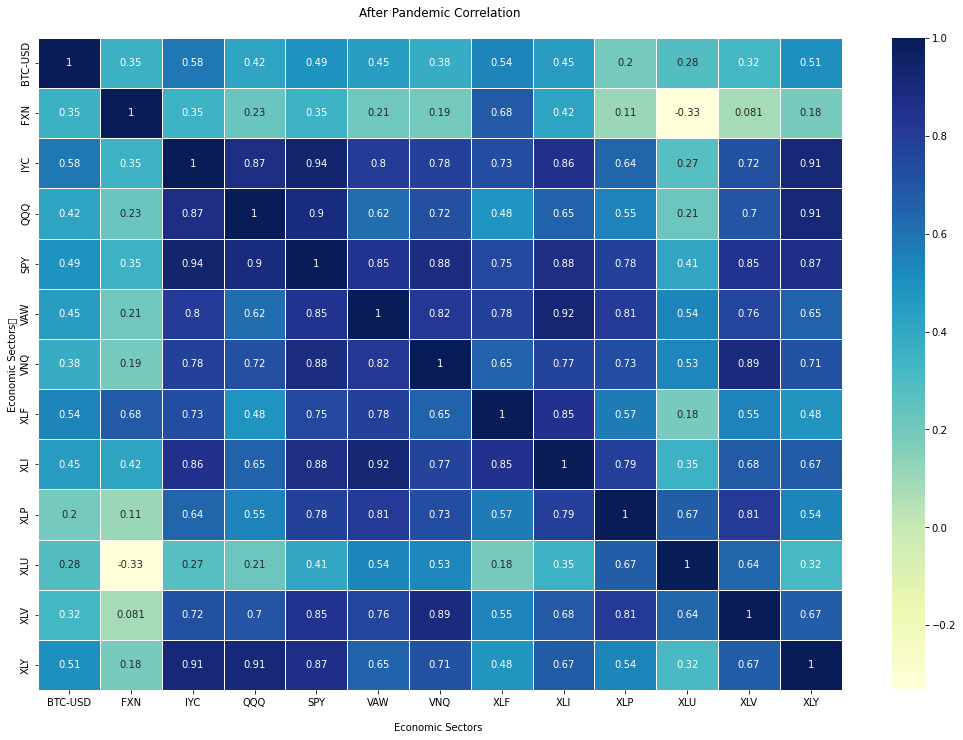

<Figure size 432x288 with 0 Axes>

In [88]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "After Pandemic Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

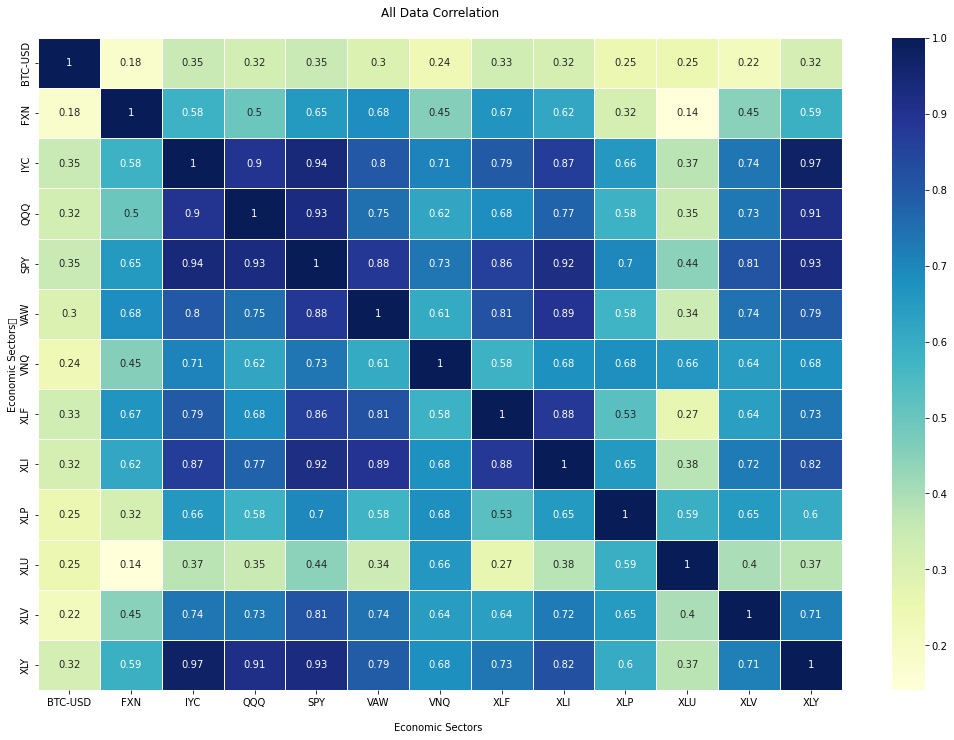

<Figure size 432x288 with 0 Axes>

In [89]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(corr_df, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "All Data Correlation\n")
plt.show()
plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [90]:
display(corr_df.loc['BTC-USD','GLD'])

display(sharpe_dict['BTC-USD'])
result = corr_df.loc['BTC-USD','GLD'] * sharpe_dict['BTC-USD']

result

KeyError: 'GLD'

In [ ]:
if sharpe_dict['GLD'] > (sharpe_dict['BTC-USD'] * corr_df.loc['BTC-USD','GLD']):
    print("This passes the Mckenzie test and should potentially be added to your portfolio")

In [ ]:
def mckenzie_test(current_holding, new_potential_holding):
    if sharpe_dict[new_potential_holding] > (sharpe_dict[current_holding] * corr_df.loc[current_holding,new_potential_holding]):
        print (f"{new_potential_holding} passes the McKenzie test and should be evaluated futher for your portfolio.")
        #print(f"The sharpe ratio of your current holding {current_holding} is {sharpe_dict[current_holding]} and {sharpe_dict[new_potential_holding]} for your new potential holding")
        #print(f"The expected correlation is {corr_df.loc[current_holding,new_potential_holding]}")
        #print(f"So therefore {corr_df.loc[current_holding,new_potential_holding]} * {sharpe_dict[current_holding]} is < {sharpe_dict[new_potential_holding]} so you should this passes the test")
        
    else:
        print(f"{new_potential_holding} does not pass the McKenzie test")
              

In [ ]:
#Gold = GLD VNQ = Real Estate, BND = Bonds, DJP = Commodities, 
mckenzie_test('BTC-USD','GLD')


In [91]:
def test_all_tickers(list):
    for ticker in list:
        mckenzie_test('BTC-USD',ticker)

In [92]:
test_all_tickers(list_of_tickers_for_yahoo_data_dump)

TypeError: mckenzie_test() missing 2 required positional arguments: 'sharpe_dict' and 'corr_df'

In [93]:
list_of_tickers = ['BTC-USD','SPY','QQQ']
sharpe_dict['BTC-USD']

1.0614713477149984

In [94]:
def mckenzie_test(list_of_tickers, new_potential_holding, sharpe_dict, corr_df):
    sharpe_sum = 0
    corr_sum = 0
    for ticker in list_of_tickers:
        if ticker in sharpe_dict:
            sharpe_sum = sharpe_dict[ticker] + sharpe_sum
    for ticker in list_of_tickers:
        corr_sum += corr_df.loc[ticker,new_potential_holding]
    corr_average =corr_sum/len(list_of_tickers)
    sharpe_ratio_average_of_portfolio = sharpe_sum/len(list_of_tickers)
    if sharpe_dict[new_potential_holding] > (sharpe_ratio_average_of_portfolio * corr_average):
        print (f"{new_potential_holding} passes the McKenzie test and should be evaluated futher for your portfolio.")
        #print(f"The sharpe ratio of your current holding {current_holding} is {sharpe_dict[current_holding]} and {sharpe_dict[new_potential_holding]} for your new potential holding")
        #print(f"The expected correlation is {corr_df.loc[current_holding,new_potential_holding]}")
        #print(f"So therefore {corr_df.loc[current_holding,new_potential_holding]} * {sharpe_dict[current_holding]} is < {sharpe_dict[new_potential_holding]} so you should this passes the test")
        
    else:
        print(f"{new_potential_holding} does not pass the McKenzie test")

In [95]:
mckenzie_test(list_of_tickers, 'BND', sharpe_dict, corr_df)

KeyError: 'BND'

In [178]:
def test_all_tickers(list):
    for ticker in list:
        mckenzie_test(list_of_tickers,ticker,sharpe_dict, corr_df)

In [179]:
test_all_tickers(list_of_tickers_for_yahoo_data_dump)

BTC-USD passes the McKenzie test and should be evaluated futher for your portfolio.
SPY passes the McKenzie test and should be evaluated futher for your portfolio.
XLF does not pass the McKenzie test
XLU passes the McKenzie test and should be evaluated futher for your portfolio.
XLV passes the McKenzie test and should be evaluated futher for your portfolio.
VAW does not pass the McKenzie test
VNQ does not pass the McKenzie test
XLP passes the McKenzie test and should be evaluated futher for your portfolio.
XLY passes the McKenzie test and should be evaluated futher for your portfolio.
FXN does not pass the McKenzie test
XLI does not pass the McKenzie test
IYC does not pass the McKenzie test
QQQ passes the McKenzie test and should be evaluated futher for your portfolio.
BND does not pass the McKenzie test
DJP does not pass the McKenzie test
GLD passes the McKenzie test and should be evaluated futher for your portfolio.
SHV does not pass the McKenzie test


In [176]:
corr_df =pct_change.corr()
pct_change

Ticker,BND,BTC-USD,CC,CPI,DJP,FXN,Fed_Rates,GLD,IYC,M3,...,SHV,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-01,0.006192,0.117421,0.021818,-0.001685,-0.042278,-0.111570,0.013043,-0.004882,0.063391,0.006586,...,-0.000091,0.027472,0.010701,0.020003,0.023490,0.030792,0.055449,0.011656,0.034785,0.054479
2014-12-01,-0.006034,-0.153034,0.054009,-0.002954,-0.083078,-0.026512,-0.051502,0.013112,0.015106,0.012484,...,-0.000091,-0.008012,-0.019806,0.005337,0.013525,-0.005799,-0.016430,0.026522,-0.017670,0.004735
2015-01-01,0.024038,-0.320835,0.048659,-0.006771,-0.044801,-0.043956,-0.149321,0.086899,-0.020616,-0.000085,...,0.000091,-0.029629,-0.027097,0.068519,-0.069551,-0.035525,-0.009693,0.023295,0.013016,-0.029938
2015-02-01,-0.015056,0.169219,-0.028409,0.002556,0.028001,0.093453,0.053191,-0.059052,0.070709,0.007484,...,0.000181,0.056205,0.077527,-0.036742,0.058236,0.053509,0.041441,-0.063949,0.042876,0.085441
2015-03-01,0.003491,-0.039483,-0.024366,0.002975,-0.055839,-0.035649,0.030303,-0.021522,-0.001800,0.009285,...,-0.000091,-0.020080,-0.035797,0.011275,-0.009856,-0.029918,-0.025395,-0.017687,0.003599,-0.008161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,-0.020649,-0.168947,-0.048183,0.006426,0.101742,0.129195,0.197279,-0.016788,-0.096905,-0.000369,...,-0.000815,-0.052741,-0.070449,-0.084217,0.000256,-0.047916,-0.014784,-0.032551,-0.068564,-0.095334
2022-02-01,-0.013012,0.122394,-0.065422,0.008159,0.073371,0.067608,0.096591,0.061217,-0.030187,-0.000647,...,-0.000363,-0.029517,0.006120,-0.034827,-0.013825,-0.008438,-0.014084,-0.019061,-0.009678,-0.040660
2022-03-01,-0.029053,0.054301,-0.054166,0.012315,0.087507,0.108559,0.103627,0.012726,0.019981,0.013591,...,-0.000363,0.034377,0.053875,0.056856,-0.005192,0.030934,0.013218,0.096128,0.054094,0.042665


# Analysis of mckenzie test


### Sectors that passed the test:

VTI = Total market fund | correlation = .34 <br> 
SPY = S&P 500 | correlation = .35<br> 
XLF = Financial | correlation = .33<br> 
XLU = Utilities | correlation = .25<br> 
XLV = Healthcare | correlation = .21<br> 
VAW = Materials | correlation = .30<br> 
XLP = Consumer Staples | correlation = .25<br> 
XLY = Consumer Discretionary | correlation = .32<br> 
XLI = Industrials | correlation = .32<br> 
IYC = Consumer services | correlation = .35<br> 
QQQ = technology | correlation = .32<br> 
GLD = Gold | correlation = .05<br> 

### Sectors that did not pass

VNQ = Real Estate | correlation = .24 <br> 
FXN = Energy | correlation = .18 <br> 
BND = Total bond market | correlation = .15 <br> 
DJP = Commodities | correlation = .17 <br> 
SHV = Cash | correlation = -.12 <br> 

In [82]:
btc = pct_change['BTC-USD'].hvplot()

cumulative = pd.DataFrame()
cumulative['BTC-USD'] =(1 + pct_change['BTC-USD']).cumprod() - 1  
cumulative['GLD'] =(1 + pct_change['GLD']).cumprod() - 1 
cumulative_plot = cumulative.hvplot()
cumulative

,BTC-USD,GLD
Date,,
2014-11-01,0.117421,-0.004882
2014-12-01,-0.053582,0.008166
2015-01-01,-0.357226,0.095775
2015-02-01,-0.248456,0.031067
2015-03-01,-0.278129,0.008876
...,...,...
2022-05-01,92.970842,0.519084
2022-06-01,57.479154,0.495296
2022-07-01,67.978560,0.456595


In [83]:
subset_cumulative = cumulative['2020-01-01':'2022-06-01']
subset_cumulative.hvplot()


:NdOverlay   [Variable]
   :Curve   [Date]   (value)

# Import Economic Data


In [84]:
#import house price index (for single family homes across US)
house_price_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/HOUUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])



In [85]:
#import fed rates on long term bonds (10 year)
long_term_fed_rates_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/Y10YDUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [86]:
#import consumer price index (inflation)
cpi_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/CPIUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [87]:
#import consumer confidence index
consumer_confidence_df = pd.read_csv(                    
    'https://www.econdb.com/api/series/CONFUS/?format=csv',                    
    index_col='Date', parse_dates=['Date'])

In [88]:
#import M2 supply (all money circulating and in bank accounts)
money_supply_df = pd.read_csv(                    
'https://www.econdb.com/api/series/M3US/?format=csv',                    
index_col='Date', parse_dates=['Date'])

In [89]:
cpi_df= cpi_df.reset_index()
consumer_confidence_df =consumer_confidence_df.reset_index()
long_term_fed_rates_df= long_term_fed_rates_df.reset_index()
money_supply_df= money_supply_df.reset_index()

In [90]:
#cpi_df.index = pd.to_datetime(cpi_pct_change.index)
cpi_df['Date'] = pd.to_datetime(cpi_df['Date'])
consumer_confidence_df['Date'] = pd.to_datetime(consumer_confidence_df['Date'])
long_term_fed_rates_df['Date'] = pd.to_datetime(long_term_fed_rates_df['Date'])
money_supply_df['Date'] = pd.to_datetime(money_supply_df['Date'])

In [91]:
cpi_df['Date'] = cpi_df['Date'].dt.date
consumer_confidence_df['Date'] = consumer_confidence_df['Date'].dt.date
long_term_fed_rates_df['Date'] = long_term_fed_rates_df['Date'].dt.date
money_supply_df['Date'] = money_supply_df['Date'].dt.date

In [92]:
display(consumer_confidence_df)
display(long_term_fed_rates_df)
display(money_supply_df)

,Date,CONFUS
0,1960-01-01,107.60
1,1960-02-01,105.20
2,1960-03-01,102.80
3,1960-04-01,100.40
4,1960-05-01,101.80
...,...,...
745,2022-02-01,67.57
746,2022-03-01,63.91
747,2022-04-01,70.15
748,2022-05-01,62.84


,Date,Y10YDUS
0,1953-04-01,2.83
1,1953-05-01,3.05
2,1953-06-01,3.11
3,1953-07-01,2.93
4,1953-08-01,2.95
...,...,...
826,2022-02-01,1.93
827,2022-03-01,2.13
828,2022-04-01,2.75
829,2022-05-01,2.90


,Date,M3US
0,1959-01-01,289.8
1,1959-02-01,287.7
2,1959-03-01,287.9
3,1959-04-01,290.2
4,1959-05-01,290.2
...,...,...
756,2022-01-01,21646.0
757,2022-02-01,21632.0
758,2022-03-01,21926.0
759,2022-04-01,21936.0


In [93]:
cpi_df['Ticker'] = 'CPI'
cpi_df['Open'] = cpi_df['CPIUS']
cpi_df['High'] =cpi_df['CPIUS']
cpi_df['Low'] = cpi_df['CPIUS']
cpi_df['Close'] =cpi_df['CPIUS']
cpi_df['Adj Close'] = cpi_df['CPIUS']
cpi_df['Volume'] =cpi_df['CPIUS']

consumer_confidence_df['Ticker'] = 'CC'
consumer_confidence_df['Open'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['High'] =consumer_confidence_df['CONFUS']
consumer_confidence_df['Low'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['Close'] =consumer_confidence_df['CONFUS']
consumer_confidence_df['Adj Close'] = consumer_confidence_df['CONFUS']
consumer_confidence_df['Volume'] =consumer_confidence_df['CONFUS']

long_term_fed_rates_df['Ticker'] = 'Fed_Rates'
long_term_fed_rates_df['Open'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['High'] =long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Low'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Close'] =long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Adj Close'] = long_term_fed_rates_df['Y10YDUS']
long_term_fed_rates_df['Volume'] =long_term_fed_rates_df['Y10YDUS']

money_supply_df['Ticker'] = 'M3'
money_supply_df['Open'] = money_supply_df['M3US']
money_supply_df['High'] =money_supply_df['M3US']
money_supply_df['Low'] = money_supply_df['M3US']
money_supply_df['Close'] =money_supply_df['M3US']
money_supply_df['Adj Close'] = money_supply_df['M3US']
money_supply_df['Volume'] =money_supply_df['M3US']
#cpi_df= cpi_df.reset_index()


In [94]:
# import datetime
# cpi_df['Date'] = pd.to_datetime(cpi_df['Date']).dt.date()
# cpi_df

In [95]:
test_df = pd.concat([tickers_and_data_df, cpi_df,consumer_confidence_df,long_term_fed_rates_df,money_supply_df], axis=0)
test_df.drop("CPIUS", axis=1, inplace=True)
test_df['Date']=pd.to_datetime(test_df['Date'])

In [96]:
test_df['Date']=pd.to_datetime(test_df['Date'])

In [97]:
pivot = pd.pivot_table(
    data=test_df,
    index='Date',
    columns ='Ticker',
    
)

pivot =pivot.dropna()

In [98]:
pivot = pivot['Close']
pivot

Ticker,BND,BTC-USD,CC,CPI,DJP,FXN,Fed_Rates,GLD,IYC,M3,...,SHV,SPY,VAW,VNQ,XLF,XLI,XLP,XLU,XLV,XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-10-01,82.360001,338.321014,93.50,237.4,34.060001,24.200001,2.30,112.660004,31.905001,11539.0,...,110.269997,201.660004,108.400002,78.989998,19.366369,55.209999,46.709999,45.470001,67.269997,68.099998
2014-11-01,82.870003,378.046997,95.54,237.0,32.619999,21.500000,2.33,112.110001,33.927502,11615.0,...,110.260002,207.199997,109.559998,80.570000,19.821283,56.910000,49.299999,46.000000,69.610001,71.809998
2014-12-01,82.370003,320.192993,100.70,236.3,29.910000,20.930000,2.21,113.580002,34.439999,11760.0,...,110.250000,205.539993,107.389999,81.000000,20.089357,56.580002,48.490002,47.220001,68.379997,72.150002
2015-01-01,84.349998,217.464005,105.60,234.7,28.570000,20.010000,1.88,123.449997,33.730000,11759.0,...,110.260002,199.449997,104.480003,86.550003,18.692120,54.570000,48.020000,48.320000,69.269997,69.989998
2015-02-01,83.080002,254.263000,102.60,235.3,29.370001,21.879999,1.98,116.160004,36.115002,11847.0,...,110.279999,210.660004,112.580002,83.370003,19.780666,57.490002,50.009998,45.230000,72.239998,75.970001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,83.000000,38483.125000,72.30,281.9,31.620001,13.460000,1.76,168.089996,75.860001,21646.0,...,110.330002,449.910004,183.009995,106.239998,39.060001,100.739998,75.970001,69.250000,131.229996,184.949997
2022-02-01,81.919998,43193.234375,67.57,284.2,33.939999,14.370000,1.93,178.380005,73.570000,21632.0,...,110.290001,436.630005,184.130005,102.540001,38.520000,99.889999,74.900002,67.930000,129.960007,177.429993
2022-03-01,79.540001,45538.675781,63.91,287.7,36.910000,15.930000,2.13,180.649994,75.040001,21926.0,...,110.250000,451.640015,194.050003,108.370003,38.320000,102.980003,75.889999,74.459999,136.990005,185.000000


In [99]:
from pathlib import Path  
filepath = Path('data/pivot.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
pivot.to_csv(filepath) 

In [100]:
pct_change = pivot.pct_change().dropna()
corr_with_cpi = pct_change.corr()

pandemic_corr = pct_change['2020-01-01':'2022-06-01'].corr()

before_pandemic_corr = pct_change['2014-10-01':'2020-02-01'].corr()


<AxesSubplot:xlabel='Date'>

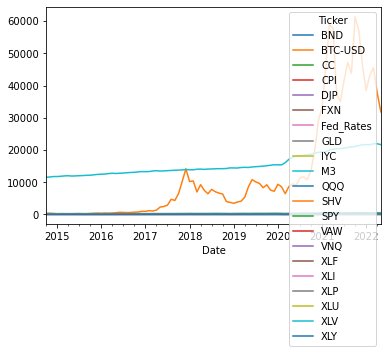

In [101]:
pivot.plot()

C:\Users\deerr\anaconda3\envs\dev\envs\dev\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


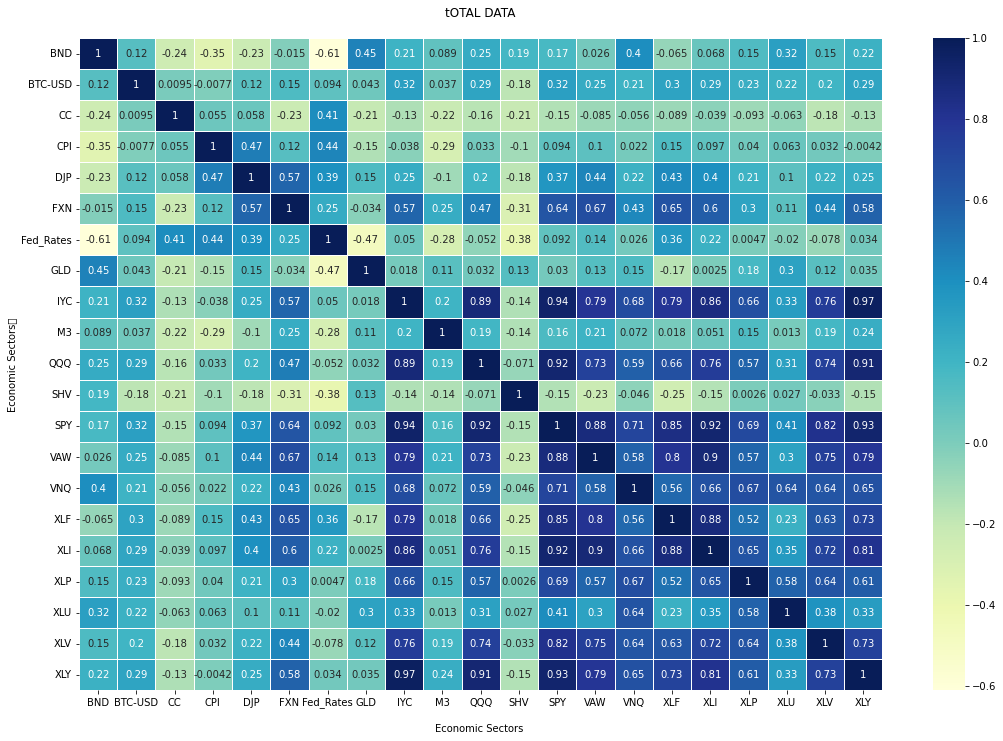

In [102]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(corr_with_cpi, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "tOTAL DATA\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")


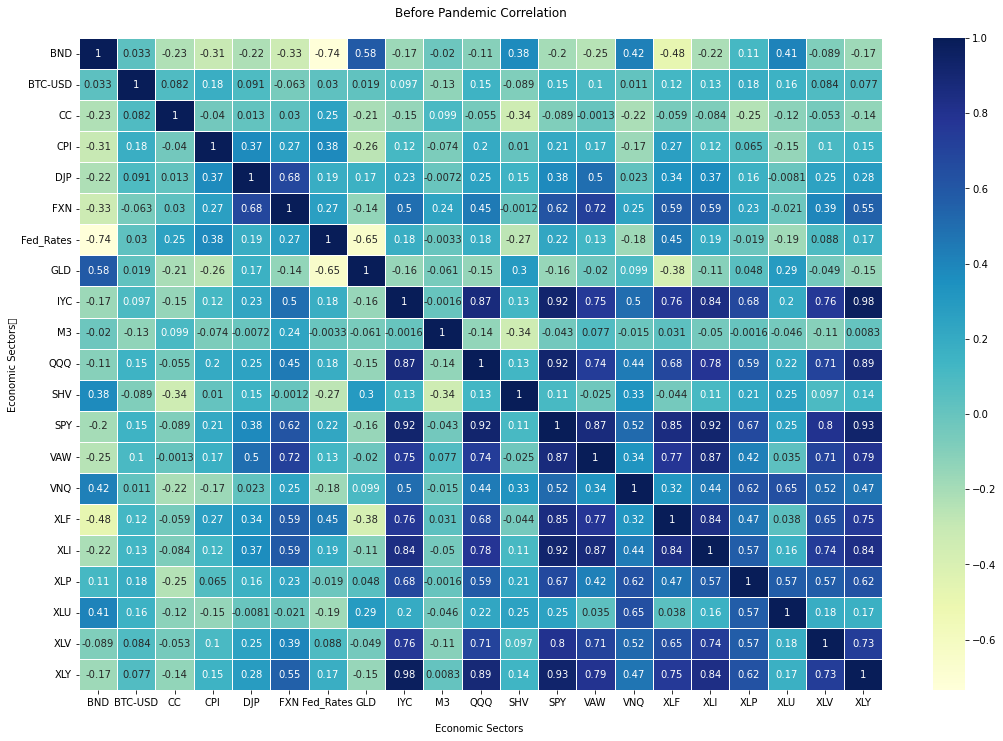

In [103]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(before_pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "Before Pandemic Correlation\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")

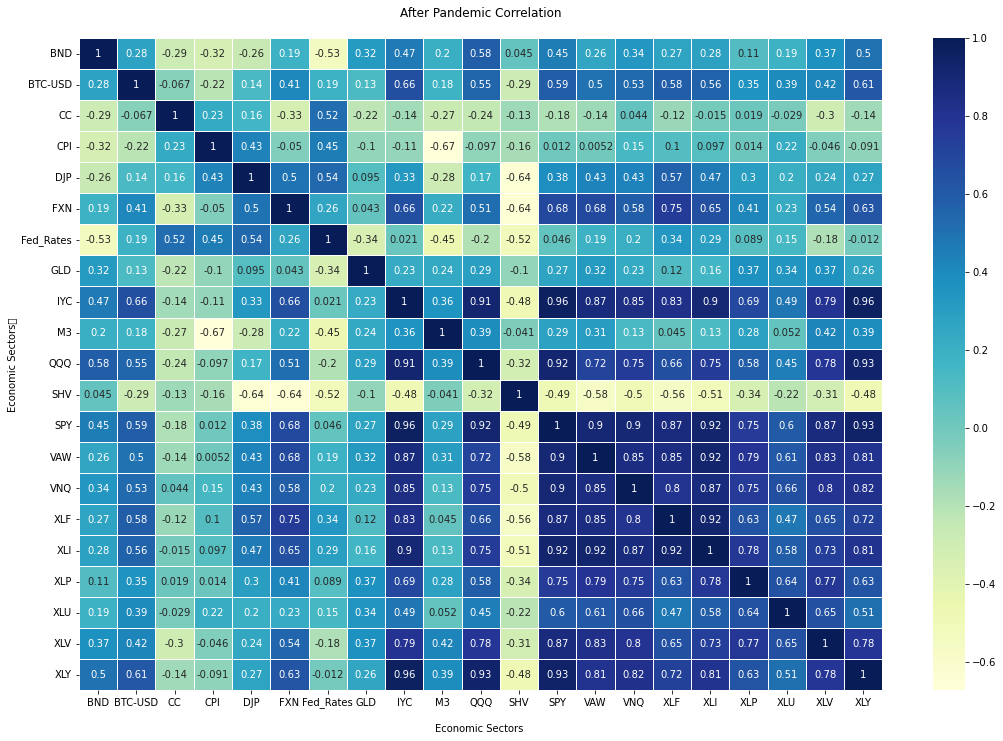

In [104]:
fig, ax = plt.subplots(figsize=(18,12))
hm = sns.heatmap(pandemic_corr, annot = True,annot_kws={'size': 10}, linewidth=.5,ax=ax, cmap="YlGnBu")
hm.set(xlabel='\nEconomic Sectors ', ylabel='Economic Sectors\t', title = "After Pandemic Correlation\n")
plt.show()
#plt.savefig("Plotting_Correlation_HeatMap.jpg")

In [120]:
import numpy as np
import scipy.stats as sps
from scipy.spatial.distance import cdist

np.random.seed(0)

def correlateOneWithMany(one, many):
    """Return Pearson's correlation coef of 'one' with each row of 'many'."""
    pr_arr = np.zeros((many.shape[0], 2), dtype=np.float64)
    pr_arr[:] = np.nan
    for row_num in np.arange(many.shape[0]):
        pr_arr[row_num, :] = sps.pearsonr(one, many[row_num, :])
    return pr_arr

In [ ]:
correlateOneWithMany(bond_df, many):

In [128]:
bond_df = pct_change['BND']
bond_df.iloc[0:]

Date
2014-11-01    0.006192
2014-12-01   -0.006034
2015-01-01    0.024038
2015-02-01   -0.015056
2015-03-01    0.003491
                ...   
2022-01-01   -0.020649
2022-02-01   -0.013012
2022-03-01   -0.029053
2022-04-01   -0.042117
2022-05-01    0.006431
Name: BND, Length: 91, dtype: float64